In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dc_tile='45_-35'

In [3]:
input_file='/LUSTRE/MADMEX/tasks/2020/1_clusterization_for_agriculture_labeling/features_computed/all_dc_tilesndvi-gndvi-avi/03-04-2020/45_-35/03-04-2020_clusters_45_-35_nclusters_11_sample_1007_with_class_aoi.shp'

In [4]:
gdf = gpd.read_file(input_file)

In [5]:
gdf.head()

,features_i,preds,class,geometry
0,140061,0,None,"POLYGON ((3270840.000 687150.000, 3270850.000 ..."
1,394085,0,None,"POLYGON ((3232030.000 708310.000, 3232050.000 ..."
2,296738,0,None,"POLYGON ((3245790.000 700160.000, 3245810.000 ..."
3,346693,0,None,"POLYGON ((3230210.000 704400.000, 3230220.000 ..."
4,431384,0,None,"POLYGON ((3229590.000 711480.000, 3229600.000 ..."


Geodataframe `gdf` is the result of the process whose description is in [link](https://conabio.sharepoint.com/:w:/s/madmex/EfZOH4wltqhAhTctUMK7ztEBL2GTOSZaeFaN6MTURSEl_Q?e=mosmmg). This `gdf` refers to dc tile '45_-35'. A summary is given next:

Polygons in `gdf` were generated using BIS segmentation with `NDVI_mean` as the input computed using sentinel2 images from oct 2018 to sept 2019. Polygons that intersected the points given by INECOL were included in `gdf` and labeled according to the class of each point. This label is in the column `class`.  Polygons that were not in the intersection were extracted using a sample of size 1000 of BIS segmentation result. All of the polygons in `gdf` have a label in the column `preds` which is the result of kmeans unsupervised classification. Kmeans was performed using as features the NDVI, GNDVI and AVI. These features were computed in a monthly-based manner using all available sentinel2 images from oct 2018 to sept 2019 for dc tile '45_-35' and madmex land cover sentinel2 map of 2018 as a mask. The number of classes for kmeans were determined using the number of classes in the dc tile given by INECOL.



**Preds**

In [6]:
s_preds = gdf['preds']

In [7]:
s_preds

0        0
1        0
2        0
3        0
4        0
        ..
1002     7
1003     6
1004    10
1005    10
1006     4
Name: preds, Length: 1007, dtype: int64

In [8]:
s_preds.value_counts()

0     160
10    137
9     134
7     132
5     111
1      92
8      73
6      51
3      44
2      42
4      31
Name: preds, dtype: int64

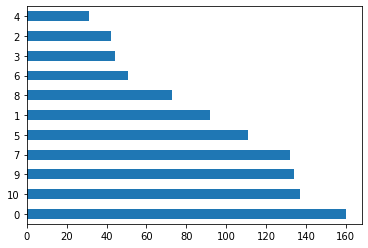

In [9]:
s_preds.value_counts().plot.barh()

**Class**

In [10]:
idx_class_not_null = gdf['class'].notnull()

In [11]:
s_class = gdf.loc[idx_class_not_null,'class']

In [12]:
s_class

319     57
320     57
321     57
322     62
323     57
        ..
1002    64
1003    64
1004    54
1005    57
1006    54
Name: class, Length: 688, dtype: object

In [13]:
s_class.value_counts()

54    241
64    144
57    136
62     67
59     49
58     26
50     14
52      5
55      4
51      1
63      1
Name: class, dtype: int64

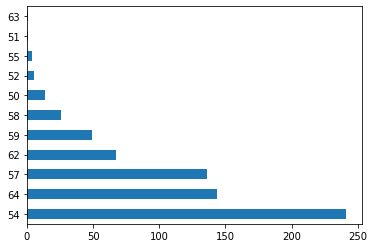

In [14]:
s_class.value_counts().plot.barh()

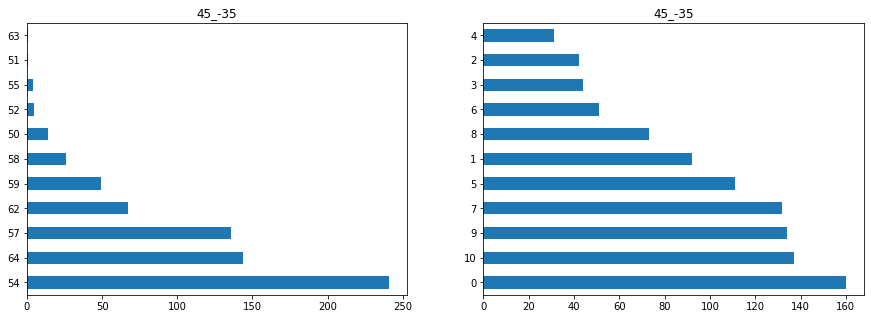

In [15]:
fg=plt.figure(1)
fg.set_figheight(5)
fg.set_figwidth(15)
plt.subplot(1,2,1)
s_class.value_counts().plot.barh()
plt.title(dc_tile)
plt.subplot(1,2,2)
s_preds.value_counts().plot.barh()
plt.title(dc_tile)
plt.show()

# Next analysis will produce some kind of matrix confusion

In [16]:
gdf.loc[idx_class_not_null,['preds','class']]

,preds,class
319,8,57
320,7,57
321,0,57
322,7,62
323,8,57
...,...,...
1002,7,64
1003,6,64
1004,10,54
1005,10,57


In [17]:
df = gdf.loc[idx_class_not_null,['preds','class']]

In [18]:
df.head()

,preds,class
319,8,57
320,7,57
321,0,57
322,7,62
323,8,57


In [19]:
df.loc[df['preds']==0]['class'].value_counts()

54    48
64    32
57    23
59    12
62     9
52     3
58     2
55     1
50     1
Name: class, dtype: int64

In [20]:
df.groupby('preds')['class'].value_counts()

preds  class
0      54       48
       64       32
       57       23
       59       12
       62        9
                ..
10     62       19
       64       15
       58       10
       59        4
       55        1
Name: class, Length: 63, dtype: int64

In [21]:
s_groupby_cluster = df.groupby('preds')['class'].value_counts()

In [22]:
s_groupby_cluster.head()

preds  class
0      54       48
       64       32
       57       23
       59       12
       62        9
Name: class, dtype: int64

In [23]:
idx = s_groupby_cluster.index

In [24]:
s_groupby_cluster.index = idx.rename(['cluster','inecol'])

In [25]:
s_groupby_cluster.unstack(level=1)

inecol,50,51,52,54,55,57,58,59,62,63,64
cluster,,,,,,,,,,,
0,1.0,NaN,3.0,48.0,1.0,23.0,2.0,12.0,9.0,NaN,32.0
1,6.0,1.0,NaN,23.0,NaN,13.0,3.0,NaN,1.0,NaN,16.0
2,1.0,NaN,NaN,4.0,1.0,3.0,NaN,NaN,NaN,NaN,4.0
3,NaN,NaN,NaN,11.0,NaN,1.0,NaN,NaN,NaN,NaN,3.0
4,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,NaN,NaN,38.0,NaN,13.0,2.0,NaN,NaN,NaN,26.0
6,NaN,NaN,NaN,8.0,NaN,7.0,NaN,2.0,2.0,NaN,3.0
7,2.0,NaN,2.0,27.0,NaN,23.0,2.0,8.0,18.0,NaN,21.0
8,1.0,NaN,NaN,10.0,1.0,15.0,NaN,16.0,1.0,NaN,NaN


In [26]:
s_groupby_cluster.groupby(level=0).transform(lambda x: (x/x.sum()).round(3))

cluster  inecol
0        54        0.366
         64        0.244
         57        0.176
         59        0.092
         62        0.069
                   ...  
10       62        0.176
         64        0.139
         58        0.093
         59        0.037
         55        0.009
Name: class, Length: 63, dtype: float64

## Proportion of INECOL classes in each cluster

In [27]:
s_percentage = s_groupby_cluster.groupby(level=0).transform(lambda x: (x/x.sum()).round(3)).unstack(level=1)

In [28]:
s_percentage

inecol,50,51,52,54,55,57,58,59,62,63,64
cluster,,,,,,,,,,,
0,0.008,NaN,0.023,0.366,0.008,0.176,0.015,0.092,0.069,NaN,0.244
1,0.095,0.016,NaN,0.365,NaN,0.206,0.048,NaN,0.016,NaN,0.254
2,0.077,NaN,NaN,0.308,0.077,0.231,NaN,NaN,NaN,NaN,0.308
3,NaN,NaN,NaN,0.733,NaN,0.067,NaN,NaN,NaN,NaN,0.200
4,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.037,NaN,NaN,0.463,NaN,0.159,0.024,NaN,NaN,NaN,0.317
6,NaN,NaN,NaN,0.364,NaN,0.318,NaN,0.091,0.091,NaN,0.136
7,0.019,NaN,0.019,0.262,NaN,0.223,0.019,0.078,0.175,NaN,0.204
8,0.023,NaN,NaN,0.227,0.023,0.341,NaN,0.364,0.023,NaN,NaN


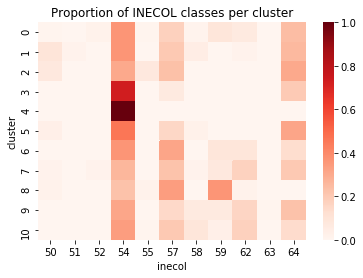

In [29]:
ax = plt.axes()
sns.heatmap(s_percentage.fillna(value=0), vmin=0, cmap='Reds',ax=ax)
ax.set_title('Proportion of INECOL classes per cluster')
plt.show()

## Proportion of cluster classes in each INECOL class


In [30]:
s_percentage2 = s_groupby_cluster.groupby(level=1).transform(lambda x: (x/x.sum()).round(3)).unstack(level=1)

In [31]:
s_percentage2

inecol,50,51,52,54,55,57,58,59,62,63,64
cluster,,,,,,,,,,,
0,0.071,NaN,0.6,0.199,0.25,0.169,0.077,0.245,0.134,NaN,0.222
1,0.429,1.0,NaN,0.095,NaN,0.096,0.115,NaN,0.015,NaN,0.111
2,0.071,NaN,NaN,0.017,0.25,0.022,NaN,NaN,NaN,NaN,0.028
3,NaN,NaN,NaN,0.046,NaN,0.007,NaN,NaN,NaN,NaN,0.021
4,NaN,NaN,NaN,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.214,NaN,NaN,0.158,NaN,0.096,0.077,NaN,NaN,NaN,0.181
6,NaN,NaN,NaN,0.033,NaN,0.051,NaN,0.041,0.030,NaN,0.021
7,0.143,NaN,0.4,0.112,NaN,0.169,0.077,0.163,0.269,NaN,0.146
8,0.071,NaN,NaN,0.041,0.25,0.110,NaN,0.327,0.015,NaN,NaN


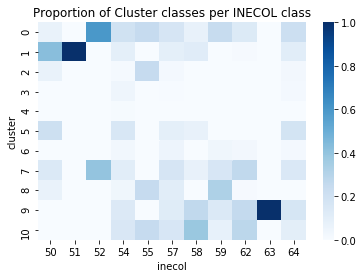

In [35]:
ax = plt.axes()
sns.heatmap(s_percentage2.fillna(value=0), vmin=0, cmap='Blues',ax=ax)
ax.set_title('Proportion of Cluster classes per INECOL class')
plt.show()

# Using a threshold to mark those preds labels that are above 30 %

In [37]:
s_threshold = s_groupby_cluster.groupby(level=0).transform(lambda x: (x/x.sum()).round(3)).unstack(level=1).apply(lambda x: x>.3)

In [38]:
s_threshold

inecol,50,51,52,54,55,57,58,59,62,63,64
cluster,,,,,,,,,,,
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,True
6,False,False,False,True,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,True,False,False,False


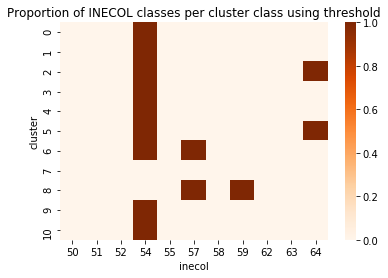

In [40]:
ax = plt.axes()
sns.heatmap(s_threshold.fillna(value=0), vmin=0, cmap='Oranges',ax=ax)
ax.set_title('Proportion of INECOL classes per cluster class using threshold')
plt.show()

# next cells would probably be deleted in the future

**just using dframes:**

In [103]:
df_groupby_cluster = df.groupby('preds')['class'].value_counts().to_frame()

In [104]:
df_groupby_cluster.head()

class
preds class       
0     54        48
      64        32
      57        23
      59        12
      62         9

In [108]:
df_groupby_cluster.rename(columns={'class':'count'},inplace=True)

In [111]:
df_groupby_cluster.head()

count
preds class       
0     54        48
      64        32
      57        23
      59        12
      62         9

In [143]:
df_groupby_cluster.unstack(level=0)

count                                                         
preds    0     1    2     3    4     5    6     7     8     9     10
class                                                               
50      1.0   6.0  1.0   NaN  NaN   3.0  NaN   2.0   1.0   NaN   NaN
51      NaN   1.0  NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN
52      3.0   NaN  NaN   NaN  NaN   NaN  NaN   2.0   NaN   NaN   NaN
54     48.0  23.0  4.0  11.0  2.0  38.0  8.0  27.0  10.0  33.0  37.0
55      1.0   NaN  1.0   NaN  NaN   NaN  NaN   NaN   1.0   NaN   1.0
57     23.0  13.0  3.0   1.0  NaN  13.0  7.0  23.0  15.0  16.0  22.0
58      2.0   3.0  NaN   NaN  NaN   2.0  NaN   2.0   NaN   7.0  10.0
59     12.0   NaN  NaN   NaN  NaN   NaN  2.0   8.0  16.0   7.0   4.0
62      9.0   1.0  NaN   NaN  NaN   NaN  2.0  18.0   1.0  17.0  19.0
63      NaN   NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN   1.0   NaN
64     32.0  16.0  4.0   3.0  NaN  26.0  3.0  21.0   NaN  24.0  15.0

In [144]:
df_groupby_cluster.unstack(level=1)

count                                                        
class    50   51   52    54   55    57    58    59    62   63    64
preds                                                              
0       1.0  NaN  3.0  48.0  1.0  23.0   2.0  12.0   9.0  NaN  32.0
1       6.0  1.0  NaN  23.0  NaN  13.0   3.0   NaN   1.0  NaN  16.0
2       1.0  NaN  NaN   4.0  1.0   3.0   NaN   NaN   NaN  NaN   4.0
3       NaN  NaN  NaN  11.0  NaN   1.0   NaN   NaN   NaN  NaN   3.0
4       NaN  NaN  NaN   2.0  NaN   NaN   NaN   NaN   NaN  NaN   NaN
5       3.0  NaN  NaN  38.0  NaN  13.0   2.0   NaN   NaN  NaN  26.0
6       NaN  NaN  NaN   8.0  NaN   7.0   NaN   2.0   2.0  NaN   3.0
7       2.0  NaN  2.0  27.0  NaN  23.0   2.0   8.0  18.0  NaN  21.0
8       1.0  NaN  NaN  10.0  1.0  15.0   NaN  16.0   1.0  NaN   NaN
9       NaN  NaN  NaN  33.0  NaN  16.0   7.0   7.0  17.0  1.0  24.0
10      NaN  NaN  NaN  37.0  1.0  22.0  10.0   4.0  19.0  NaN  15.0

**just few lines that could help in the future**

In [34]:
df['color_preds']=df['preds'].apply(lambda x: int(x)/10)

In [35]:
df.head()

,preds,class,color_preds
319,8,57,0.8
320,7,57,0.7
321,0,57,0.0
322,7,62,0.7
323,8,57,0.8


In [39]:
df['color_class']=df['class'].apply(lambda x: int(x)/100)

In [40]:
df.head()

,preds,class,color_preds,color_class
319,8,57,0.8,0.57
320,7,57,0.7,0.57
321,0,57,0.0,0.57
322,7,62,0.7,0.62
323,8,57,0.8,0.57


**How many classes given by INECOL has each cluster?**

In [41]:
df.loc[idx_class_not_null,['preds','class']].groupby('preds').count()

,class
preds,
0,131
1,63
2,13
3,15
4,2
5,82
6,22
7,103
8,44


So the $11$ clusters has a mix of classes given of INECOL. All but clusters with labels $2,3,4,6$ has a large number of classes mixed.

In [45]:
df.loc[idx_class_not_null,['preds','class','color_class']].groupby(['preds','color_class']).count()

class
preds color_class       
0     0.50             1
      0.52             3
      0.54            48
      0.55             1
      0.57            23
...                  ...
10    0.57            22
      0.58            10
      0.59             4
      0.62            19
      0.64            15

[63 rows x 1 columns]

In [46]:
df_cluster = df.loc[idx_class_not_null,['preds','class','color_class']].groupby(['preds','color_class']).count()

In [54]:
df_cluster.head()

class
preds color_class       
0     0.50             1
      0.52             3
      0.54            48
      0.55             1
      0.57            23

In [57]:
df_cluster['class'].reset_index('preds').groupby('preds').count()

,class
preds,
0,9
1,7
2,5
3,3
4,1
5,5
6,5
7,8
8,6


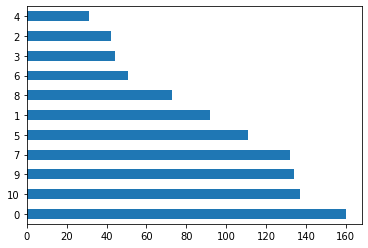

In [47]:
s_preds.value_counts().plot.barh()

**How many labels of the clusters are in a given class of INECOL?** <- but this doesn't say anything!

In [42]:
df.loc[idx_class_not_null,['preds','class']].groupby('class').count()

,preds
class,
50,14
51,1
52,5
54,241
55,4
57,136
58,26
59,49
62,67
